# Packages

In [1]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [2]:
DataType = "Iris"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData005 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.005)
AnalyzedData01 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.01)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData02 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.02)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)
AnalyzedData030 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.030)
AnalyzedData035 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.035)
AnalyzedData04 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.04)


# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData005["Error_DUREAL"].shape[0],
                        AnalyzedData01["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData02["Error_DUREAL"].shape[0],
                        AnalyzedData025["Error_DUREAL"].shape[0],
                        AnalyzedData030["Error_DUREAL"].shape[0],
                        AnalyzedData035["Error_DUREAL"].shape[0],
                        AnalyzedData04["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData005["Error_UNREAL"].shape[0],
                         AnalyzedData01["Error_UNREAL"].shape[0],
                         AnalyzedData015["Error_UNREAL"].shape[0],
                         AnalyzedData02["Error_UNREAL"].shape[0], 
                         AnalyzedData025["Error_UNREAL"].shape[0], 
                         AnalyzedData030["Error_UNREAL"].shape[0], 
                         AnalyzedData035["Error_UNREAL"].shape[0], 
                         AnalyzedData04["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(5,45,5)
ShapeTable.index = ShapeTable.index/100
ShapeTable

,DUREAL,UNREAL
0.05,100,100
0.10,100,99
0.15,100,100
0.20,100,100
0.25,100,100
0.30,100,100
0.35,100,100
0.40,100,100


# Run Time

In [4]:
TimeTable = {
    "DUREAL Mean":[str(round(np.mean(AnalyzedData005["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData01["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData02["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData030["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData035["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData04["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedData005["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData01["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData02["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData030["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData035["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData04["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedData005["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData01["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData02["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData030["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData035["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData04["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedData005["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData01["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData02["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData030["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData035["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData04["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = range(5,45,5)
TimeTable.index = TimeTable.index/100
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
0.05,0.16,0.16,0.32,0.32
0.10,0.25,0.25,0.54,0.56
0.15,0.41,0.4,1.25,1.31
0.20,1.69,1.71,4.88,4.69
0.25,3.23,3.26,14.69,13.06
0.30,20.24,20.15,60.53,73.14
0.35,28.65,28.04,112.22,129.87
0.40,133.58,135.75,403.02,425.54


# Error Vec

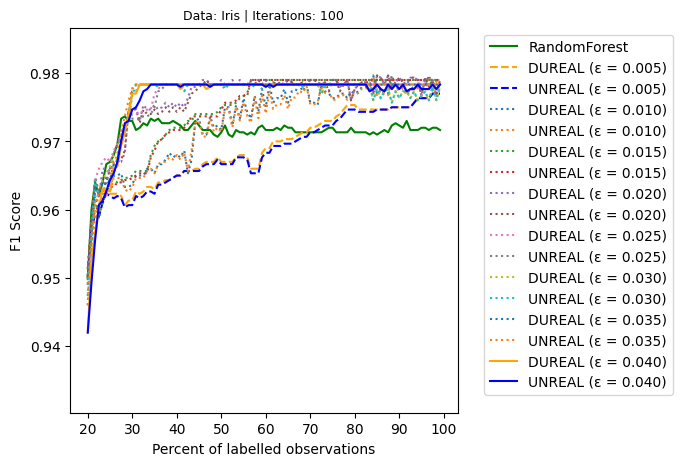

In [5]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL005": "orange",
    "UNREAL005": "blue",
    "DUREAL04": "orange",
    "UNREAL04": "blue"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL005": "dashed",
    "UNREAL005": "dashed",
    "DUREAL04": "solid",
    "UNREAL04": "solid"
}

LegendMapping = {
    "DUREAL005": "DUREAL (ε = 0.005)",
    "UNREAL005": "UNREAL (ε = 0.005)",
    "DUREAL01": "DUREAL (ε = 0.010)",
    "UNREAL01": "UNREAL (ε = 0.010)",
    "DUREAL015": "DUREAL (ε = 0.015)",
    "UNREAL015": "UNREAL (ε = 0.015)",
    "DUREAL02": "DUREAL (ε = 0.020)",
    "UNREAL02": "UNREAL (ε = 0.020)",
    "DUREAL025": "DUREAL (ε = 0.025)",
    "UNREAL025": "UNREAL (ε = 0.025)",
    "DUREAL03": "DUREAL (ε = 0.030)",
    "UNREAL03": "UNREAL (ε = 0.030)",
    "DUREAL035": "DUREAL (ε = 0.035)",
    "UNREAL035": "UNREAL (ε = 0.035)",
    "DUREAL04": "DUREAL (ε = 0.040)",
    "UNREAL04": "UNREAL (ε = 0.040)",
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL005 = AnalyzedData005["Error_DUREAL"],
                 UNREAL005 = AnalyzedData005["Error_UNREAL"],
                 DUREAL01 = AnalyzedData01["Error_DUREAL"],
                 UNREAL01 = AnalyzedData01["Error_UNREAL"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL02 = AnalyzedData02["Error_DUREAL"],
                 UNREAL02 = AnalyzedData02["Error_UNREAL"],
                 DUREAL025 = AnalyzedData025["Error_DUREAL"],
                 UNREAL025 = AnalyzedData025["Error_UNREAL"],
                 DUREAL03 = AnalyzedData030["Error_DUREAL"],
                 UNREAL03 = AnalyzedData030["Error_UNREAL"],
                 DUREAL035 = AnalyzedData035["Error_DUREAL"],
                 UNREAL035 = AnalyzedData035["Error_UNREAL"],
                 DUREAL04 = AnalyzedData04["Error_DUREAL"],
                 UNREAL04 = AnalyzedData04["Error_UNREAL"],
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Selection History

In [6]:
# SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
# SelectionHistoryRank_UNREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_UNREAL"], DataType = DataType)
# SelectionHistoryRank_DUREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_DUREAL"], DataType = DataType)
# SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_UNREAL15.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_DUREAL15.sort_values(by = "AverageRank").head()

# Tree Counts

## Set Up

In [7]:
AnalyzedDataSmall = AnalyzedData005
AnalyzedDataLarge = AnalyzedData04

In [8]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

## Number of All Trees

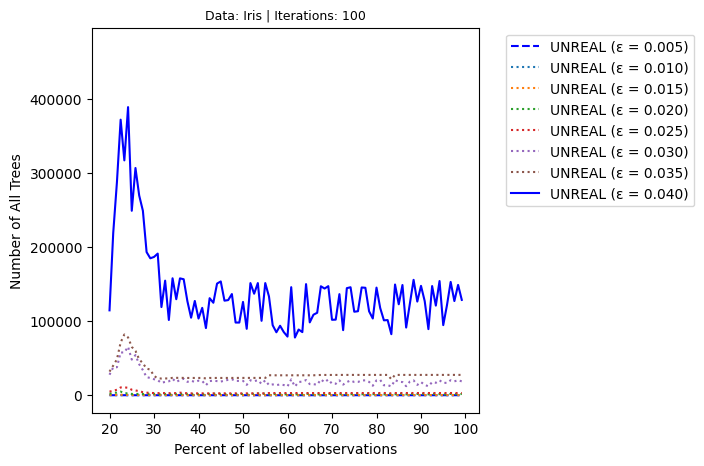

In [9]:
### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                #  DUREAL005 = AnalyzedData005["TreeCounts_UNIQUE_UNREAL"],
                 UNREAL005 = AnalyzedData005["TreeCounts_ALL_UNREAL"],
                #  DUREAL01 = AnalyzedData01["TreeCounts_UNIQUE_UNREAL"],
                 UNREAL01 = AnalyzedData01["TreeCounts_ALL_UNREAL"],
                #  DUREAL015 = AnalyzedData015["TreeCounts_UNIQUE_UNREAL"],
                 UNREAL015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                #  DUREAL02 = AnalyzedData02["TreeCounts_UNIQUE_UNREAL"],
                 UNREAL02 = AnalyzedData02["TreeCounts_ALL_UNREAL"],
                #  DUREAL025 = AnalyzedData025["TreeCounts_UNIQUE_UNREAL"],
                 UNREAL025 = AnalyzedData025["TreeCounts_ALL_UNREAL"],
                #  DUREAL03 = AnalyzedData030["TreeCounts_UNIQUE_UNREAL"],
                 UNREAL03 = AnalyzedData030["TreeCounts_ALL_UNREAL"],
                #  DUREAL035 = AnalyzedData035["TreeCounts_UNIQUE_UNREAL"],
                 UNREAL035 = AnalyzedData035["TreeCounts_ALL_UNREAL"],
                #  DUREAL04 = AnalyzedData04["TreeCounts_UNIQUE_UNREAL"],
                 UNREAL04 = AnalyzedData04["TreeCounts_ALL_UNREAL"],
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of All Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Number of Unique Trees

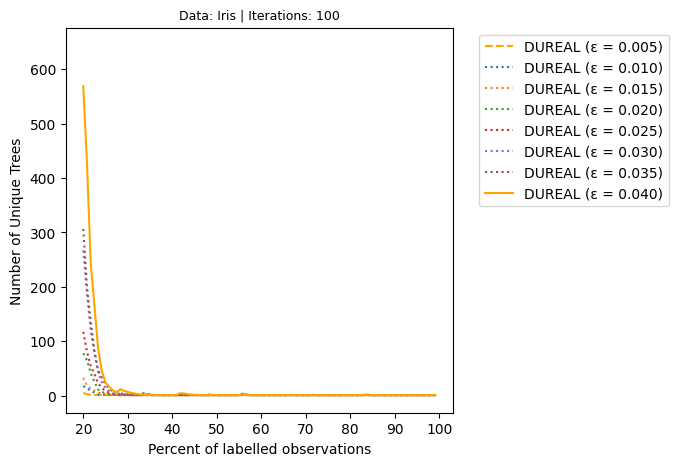

In [10]:
### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 DUREAL005 = AnalyzedData005["TreeCounts_UNIQUE_UNREAL"],
                #  UNREAL005 = AnalyzedData005["TreeCounts_ALL_UNREAL"],
                 DUREAL01 = AnalyzedData01["TreeCounts_UNIQUE_UNREAL"],
                #  UNREAL01 = AnalyzedData01["TreeCounts_ALL_UNREAL"],
                 DUREAL015 = AnalyzedData015["TreeCounts_UNIQUE_UNREAL"],
                #  UNREAL015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                 DUREAL02 = AnalyzedData02["TreeCounts_UNIQUE_UNREAL"],
                #  UNREAL02 = AnalyzedData02["TreeCounts_ALL_UNREAL"],
                 DUREAL025 = AnalyzedData025["TreeCounts_UNIQUE_UNREAL"],
                #  UNREAL025 = AnalyzedData025["TreeCounts_ALL_UNREAL"],
                 DUREAL03 = AnalyzedData030["TreeCounts_UNIQUE_UNREAL"],
                #  UNREAL03 = AnalyzedData030["TreeCounts_ALL_UNREAL"],
                 DUREAL035 = AnalyzedData035["TreeCounts_UNIQUE_UNREAL"],
                #  UNREAL035 = AnalyzedData035["TreeCounts_ALL_UNREAL"],
                 DUREAL04 = AnalyzedData04["TreeCounts_UNIQUE_UNREAL"],
                #  UNREAL04 = AnalyzedData04["TreeCounts_ALL_UNREAL"],
                 Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Unique Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)